In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
import glob

In [3]:
path="C:/Users/Jihed/Desktop/New folder/"

In [4]:
all_file=glob.glob(path+"/*.csv")

In [5]:
data=pd.DataFrame()
for filename in all_file:
    d=pd.read_csv(filename,index_col='Date',parse_dates=True)
    data[filename[34:len(filename)-4]]=d['Close']

The dataset "data" contient contains all the data commodities,crypto and currencies

In [6]:
data

,Aave,Aluminum,AUDCAD,AUDCHF,AUDJPY,AUDNZD,AUDUSD,Binance Coin,Bitcoin Cash,Bitcoin,...,TRON,Uniswap,US Corn,USD Coin,USDCAD,USDCHF,USDJPY,VeChain,XRP,Zinc
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-30,0.15,2206.00,0.9970,0.7551,87.92,1.1025,0.8083,11.47,1472.19,10166.0,...,0.054993,NaN,361.50,NaN,1.2334,0.9343,108.78,5.966220,1.11266,3512.0
2018-01-31,0.14,2218.50,0.9920,0.7502,87.97,1.0937,0.8055,11.31,1492.09,10265.4,...,0.054575,NaN,361.50,NaN,1.2315,0.9314,109.19,6.427673,1.13931,3528.5
2018-02-01,0.11,2223.75,0.9860,0.7447,87.95,1.0866,0.8039,9.51,1276.07,9181.1,...,0.047019,NaN,361.75,NaN,1.2268,0.9263,109.41,5.464527,0.95131,3561.5
2018-02-02,0.10,2208.50,0.9845,0.7378,87.23,1.0849,0.7923,9.75,1194.58,8893.2,...,0.042145,NaN,361.50,NaN,1.2426,0.9313,110.11,4.921161,0.89930,3510.0
2018-02-03,0.11,NaN,NaN,NaN,NaN,NaN,NaN,9.75,1275.42,9241.1,...,0.045520,NaN,NaN,NaN,NaN,NaN,NaN,5.512552,0.95978,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-19,54.02,NaN,NaN,NaN,NaN,NaN,NaN,215.00,120.50,20577.2,...,0.061318,4.19,NaN,1.0013,NaN,NaN,NaN,0.023050,0.32626,NaN
2022-06-20,61.68,2527.00,0.9018,0.6721,93.85,1.0962,0.6948,216.60,118.80,20572.3,...,0.061108,4.29,NaN,1.0013,1.2979,0.9673,135.08,0.023531,0.32242,3517.5
2022-06-21,66.39,2533.50,0.9002,0.6730,95.19,1.1006,0.6970,220.10,119.40,20720.4,...,0.064928,4.77,760.75,1.0012,1.2919,0.9661,136.61,0.023690,0.32936,3592.0


In [7]:
data=data.dropna()
data

,Aave,Aluminum,AUDCAD,AUDCHF,AUDJPY,AUDNZD,AUDUSD,Binance Coin,Bitcoin Cash,Bitcoin,...,TRON,Uniswap,US Corn,USD Coin,USDCAD,USDCHF,USDJPY,VeChain,XRP,Zinc
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-06,38.71,1901.5,0.9471,0.6531,74.97,1.0710,0.7255,29.06,257.55,15577.9,...,0.026247,2.5690,406.75,0.9986,1.3055,0.9005,103.33,0.011183,0.25848,2634.5
2020-11-09,55.32,1893.5,0.9471,0.6651,76.72,1.0676,0.7285,28.09,263.97,15327.2,...,0.024931,2.6800,407.50,0.9993,1.3007,0.9133,105.36,0.011031,0.25043,2641.5
2020-11-10,66.91,1908.0,0.9490,0.6667,76.69,1.0662,0.7284,28.19,256.84,15303.6,...,0.024948,3.0751,423.00,0.9990,1.3029,0.9153,105.28,0.011583,0.25374,2645.0
2020-11-11,54.77,1918.0,0.9507,0.6676,76.72,1.0574,0.7278,27.99,256.50,15695.8,...,0.025174,2.9341,417.25,0.9990,1.3062,0.9173,105.42,0.011339,0.25569,2624.0
2020-11-12,51.17,1930.0,0.9501,0.6615,76.02,1.0569,0.7231,27.71,259.38,16294.7,...,0.025090,2.9598,408.25,0.9989,1.3139,0.9148,105.12,0.010649,0.25486,2626.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-21,270.56,2846.0,0.9267,0.6676,78.97,1.0321,0.7231,343.30,504.74,40651.3,...,0.088162,19.0100,517.00,1.0001,1.2815,0.9233,109.21,0.085868,0.87323,2978.0
2021-09-22,301.79,2935.0,0.9252,0.6710,79.54,1.0329,0.7245,378.83,547.56,43551.6,...,0.098757,21.6300,525.50,0.9994,1.2770,0.9261,109.78,0.099414,1.00373,3025.5
2021-09-23,308.82,2949.5,0.9232,0.6741,80.46,1.0318,0.7295,383.63,552.43,44869.2,...,0.099186,21.5000,529.25,0.9994,1.2655,0.9240,110.30,0.102055,1.00139,3091.0


In [8]:
daily_returns=data.pct_change()
annual_mean_returns=daily_returns.mean()*252
annual_return_variance=daily_returns.var()*252

In [9]:
df2=pd.DataFrame(data.columns,columns=['Stock_Symbols'])
df2['Variances']=annual_return_variance.values
df2['returns']=annual_mean_returns.values

In [10]:
df2

,Stock_Symbols,Variances,returns
0,Aave,2.529029,3.486868
1,Aluminum,0.040090,0.501662
2,AUDCAD,0.003693,-0.031969
3,AUDCHF,0.006372,0.040102
4,AUDJPY,0.007631,0.091239
...,...,...,...
62,USDCHF,0.004472,0.034006
63,USDJPY,0.003053,0.084300
64,VeChain,2.727720,3.696191
65,XRP,4.227948,3.295674


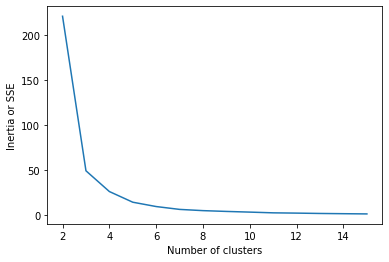

In [11]:
X=df2[['Variances','returns']]
inertia_list=[]
for k in range(2,16):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)
    
plt.plot(range(2,16),inertia_list)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia or SSE')
plt.show()

In [12]:
kmeans=KMeans(n_clusters=3).fit(X)

In [13]:
labels=kmeans.labels_
df2['Cluster_label']=labels

In [14]:
df2

,Stock_Symbols,Variances,returns,Cluster_label
0,Aave,2.529029,3.486868,0
1,Aluminum,0.040090,0.501662,2
2,AUDCAD,0.003693,-0.031969,2
3,AUDCHF,0.006372,0.040102,2
4,AUDJPY,0.007631,0.091239,2
...,...,...,...,...
62,USDCHF,0.004472,0.034006,2
63,USDJPY,0.003053,0.084300,2
64,VeChain,2.727720,3.696191,0
65,XRP,4.227948,3.295674,0


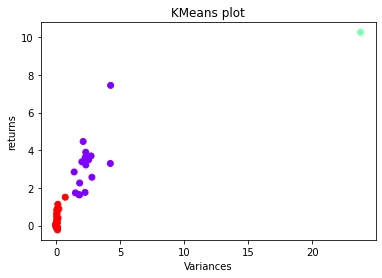

In [15]:
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=labels,cmap='rainbow')
plt.title('KMeans plot')
plt.xlabel('Variances')
plt.ylabel('returns')
plt.show()

In [16]:
# realement ils sont deux classes l'un avec faible variance et faible et l'autre avec fort return et fort variance

<h2> Pour les commodities

In [17]:
path2='C:/Users/Jihed/Desktop/datahack_reduced/commodities'

In [18]:
all_file=glob.glob(path2+"/*.csv")

In [19]:
data1=pd.DataFrame()
for filename in all_file:
    d=pd.read_csv(filename,index_col='Date',parse_dates=True)
    data1[filename[52:len(filename)-4]]=d['Close']

In [20]:
data1=data1.dropna()
data1

,Aluminum,Brent Oil,Carbon Emissions,Copper,Crude Oil WTI,Gasoline RBOB,Gold,Heating Oil,Lead,London Gas Oil,Natural Gas,Nickel,Oats,Palladium,Platinum,Silver,Tin,US Corn,Zinc
Date,,,,,,,,,,,,,,,,,,,
2015-01-02,1828.00,56.42,7.01,2.8380,52.69,1.4334,1337.7,1.7957,1869.00,519.25,3.003,14852.0,302.25,794.85,1203.20,15.734,19811.0,395.75,2203.25
2015-01-05,1812.25,53.11,6.90,2.7930,50.04,1.3814,1353.5,1.7492,1841.50,495.50,2.882,15125.0,306.00,793.20,1212.95,16.213,19525.0,406.00,2182.00
2015-01-06,1780.25,51.10,6.77,2.8040,47.93,1.3543,1362.2,1.7262,1842.75,487.50,2.938,15256.0,304.50,800.40,1219.65,16.637,19601.0,405.00,2172.50
2015-01-07,1783.50,51.15,6.78,2.7960,48.65,1.3376,1353.6,1.6999,1842.50,477.50,2.871,15531.0,301.75,792.45,1220.65,16.544,19675.0,396.25,2137.00
2015-01-08,1825.50,50.96,6.81,2.8070,48.79,1.3409,1351.6,1.7110,1852.00,479.75,2.927,15540.0,302.25,793.10,1220.30,16.385,19701.0,394.25,2160.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-15,2592.50,118.51,86.35,4.1635,115.31,3.8942,1819.6,4.5470,2077.00,1332.25,7.420,25857.0,661.25,1848.28,936.25,21.420,32444.0,774.00,3643.00
2022-06-16,2504.50,119.81,83.00,4.1080,117.59,3.9558,1849.9,4.5713,2101.00,1300.25,7.464,25259.0,658.25,1871.50,946.90,21.885,32000.0,788.25,3577.50
2022-06-17,2498.00,113.12,82.12,4.0135,109.56,3.7930,1840.6,4.3398,2061.50,1294.00,6.944,25669.0,620.50,1797.53,932.45,21.587,31184.0,784.50,3523.50


In [21]:
daily_returns=data1.pct_change()
annual_mean_returns=daily_returns.mean()*252
annual_return_variance=daily_returns.var()*252

In [22]:
df3=pd.DataFrame(data1.columns,columns=['Stock_Symbols'])
df3['Variances']=annual_return_variance.values
df3['returns']=annual_mean_returns.values

In [23]:
df3

,Stock_Symbols,Variances,returns
0,Aluminum,0.038130,0.060707
1,Brent Oil,0.183520,0.186164
2,Carbon Emissions,0.213809,0.443509
3,Copper,0.040608,0.065276
4,Crude Oil WTI,0.116388,0.150444
5,Gasoline RBOB,0.132846,0.200605
6,Gold,0.022941,0.054919
7,Heating Oil,0.163436,0.205076
8,Lead,0.050599,0.035906
9,London Gas Oil,0.139957,0.194010


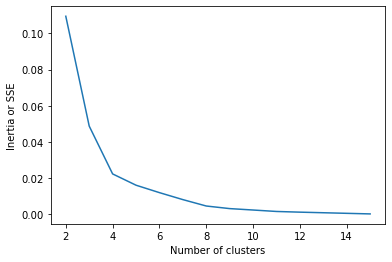

In [24]:
X2=df3[['Variances','returns']]
inertia_list=[]
for k in range(2,16):
    kmeans1=KMeans(n_clusters=k)
    kmeans1.fit(X2)
    inertia_list.append(kmeans1.inertia_)
    
plt.plot(range(2,16),inertia_list)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia or SSE')
plt.show()

In [25]:
kmeans2=KMeans(n_clusters=4).fit(X2)
labels2=kmeans2.labels_
df3['Cluster_label']=labels2

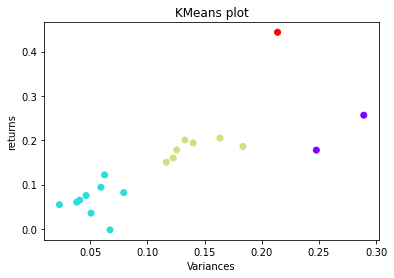

In [26]:
plt.scatter(X2.iloc[:,0],X2.iloc[:,1],c=labels2,cmap='rainbow')
plt.title('KMeans plot')
plt.xlabel('Variances')
plt.ylabel('returns')
plt.show()

<h2> Pour crypto

In [27]:
path2='C:/Users/Jihed/Desktop/datahack_reduced/crypto'
all_file=glob.glob(path2+"/*.csv")
data2=pd.DataFrame()
for filename in all_file:
    d=pd.read_csv(filename,index_col='Date',parse_dates=True)
    data2[filename[47:len(filename)-4]]=d['Close']

In [28]:
data2=data2.dropna()
data2

,Aave,Binance Coin,Bitcoin Cash,Bitcoin,Cardano,Chainlink,Dogecoin,Ethereum,Filecoin,Litecoin,Polkadot,Stellar,Terra,Tether,THETA,TRON,Uniswap,USD Coin,VeChain,XRP
Date,,,,,,,,,,,,,,,,,,,,
2020-11-06,38.71,29.06,257.55,15577.9,0.1090,12.17,0.002757,455.72,31.74,63.130,4.587,0.08388,0.3063,1.0000,0.6782,0.026247,2.5690,0.9986,0.011183,0.25848
2020-11-07,44.41,27.76,253.76,14828.4,0.1013,11.75,0.002670,435.40,29.96,58.856,4.240,0.07955,0.2912,1.0016,0.6381,0.025097,2.4750,0.9988,0.010382,0.24897
2020-11-08,53.72,28.38,270.68,15483.7,0.1066,12.72,0.002707,454.68,30.76,61.027,4.375,0.08149,0.3036,1.0010,0.6645,0.025376,2.8724,0.9994,0.011127,0.25380
2020-11-09,55.32,28.09,263.97,15327.2,0.1053,12.49,0.002673,444.33,31.67,59.232,4.349,0.07960,0.2978,1.0004,0.6408,0.024931,2.6800,0.9993,0.011031,0.25043
2020-11-10,66.91,28.19,256.84,15303.6,0.1060,13.02,0.002760,450.22,30.34,57.843,4.419,0.07962,0.3086,1.0012,0.6403,0.024948,3.0751,0.9990,0.011583,0.25374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-23,308.82,383.63,552.43,44869.2,2.3277,25.41,0.224668,3152.92,74.62,163.840,33.435,0.30294,36.1600,1.0007,5.7062,0.099186,21.5000,0.9994,0.102055,1.00139
2021-09-24,280.77,355.10,513.60,42819.9,2.2780,23.27,0.209142,2928.57,63.29,152.021,30.835,0.28114,40.1600,1.0010,5.1776,0.092258,19.6600,0.9993,0.092378,0.94465
2021-09-25,274.39,349.51,516.87,42686.8,2.2985,24.50,0.208383,2922.55,60.45,150.940,29.831,0.27704,37.8900,1.0013,5.0989,0.090566,19.4700,0.9994,0.089971,0.94014


In [29]:
daily_returns=data2.pct_change()
annual_mean_returns=daily_returns.mean()*252
annual_return_variance=daily_returns.var()*252

df4=pd.DataFrame(data2.columns,columns=['Stock_Symbols'])
df4['Variances']=annual_return_variance.values
df4['returns']=annual_mean_returns.values

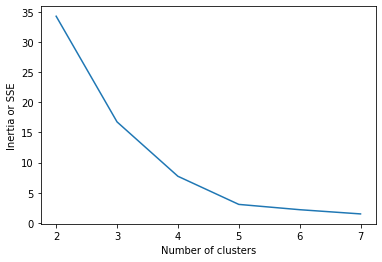

In [30]:
X3=df4[['Variances','returns']]
inertia_list=[]
for k in range(2,8):
    kmeans1=KMeans(n_clusters=k)
    kmeans1.fit(X3)
    inertia_list.append(kmeans1.inertia_)
    
plt.plot(range(2,8),inertia_list)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia or SSE')
plt.show()

In [31]:
kmeans3=KMeans(n_clusters=4).fit(X3)

In [32]:
labels3=kmeans3.labels_
df4['Cluster_label']=labels3

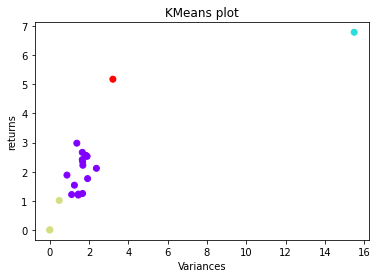

In [33]:
plt.scatter(X3.iloc[:,0],X3.iloc[:,1],c=labels3,cmap='rainbow')
plt.title('KMeans plot')
plt.xlabel('Variances')
plt.ylabel('returns')
plt.show()

<h2> Pour currencies

In [34]:
path3='C:/Users/Jihed/Desktop/datahack_reduced/currencies'
all_file=glob.glob(path2+"/*.csv")
data3=pd.DataFrame()
for filename in all_file:
    d=pd.read_csv(filename,index_col='Date',parse_dates=True)
    data3[filename[47:len(filename)-4]]=d['Close']

In [35]:
data3=data3.dropna()
data3

,Aave,Binance Coin,Bitcoin Cash,Bitcoin,Cardano,Chainlink,Dogecoin,Ethereum,Filecoin,Litecoin,Polkadot,Stellar,Terra,Tether,THETA,TRON,Uniswap,USD Coin,VeChain,XRP
Date,,,,,,,,,,,,,,,,,,,,
2020-11-06,38.71,29.06,257.55,15577.9,0.1090,12.17,0.002757,455.72,31.74,63.130,4.587,0.08388,0.3063,1.0000,0.6782,0.026247,2.5690,0.9986,0.011183,0.25848
2020-11-07,44.41,27.76,253.76,14828.4,0.1013,11.75,0.002670,435.40,29.96,58.856,4.240,0.07955,0.2912,1.0016,0.6381,0.025097,2.4750,0.9988,0.010382,0.24897
2020-11-08,53.72,28.38,270.68,15483.7,0.1066,12.72,0.002707,454.68,30.76,61.027,4.375,0.08149,0.3036,1.0010,0.6645,0.025376,2.8724,0.9994,0.011127,0.25380
2020-11-09,55.32,28.09,263.97,15327.2,0.1053,12.49,0.002673,444.33,31.67,59.232,4.349,0.07960,0.2978,1.0004,0.6408,0.024931,2.6800,0.9993,0.011031,0.25043
2020-11-10,66.91,28.19,256.84,15303.6,0.1060,13.02,0.002760,450.22,30.34,57.843,4.419,0.07962,0.3086,1.0012,0.6403,0.024948,3.0751,0.9990,0.011583,0.25374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-23,308.82,383.63,552.43,44869.2,2.3277,25.41,0.224668,3152.92,74.62,163.840,33.435,0.30294,36.1600,1.0007,5.7062,0.099186,21.5000,0.9994,0.102055,1.00139
2021-09-24,280.77,355.10,513.60,42819.9,2.2780,23.27,0.209142,2928.57,63.29,152.021,30.835,0.28114,40.1600,1.0010,5.1776,0.092258,19.6600,0.9993,0.092378,0.94465
2021-09-25,274.39,349.51,516.87,42686.8,2.2985,24.50,0.208383,2922.55,60.45,150.940,29.831,0.27704,37.8900,1.0013,5.0989,0.090566,19.4700,0.9994,0.089971,0.94014


In [36]:
daily_returns=data3.pct_change()
annual_mean_returns=daily_returns.mean()*252
annual_return_variance=daily_returns.var()*252

df5=pd.DataFrame(data3.columns,columns=['Stock_Symbols'])
df5['Variances']=annual_return_variance.values
df5['returns']=annual_mean_returns.values

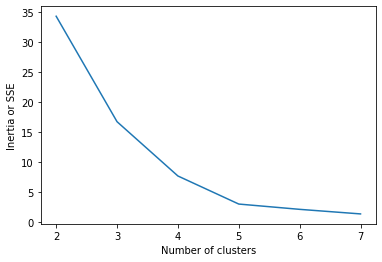

In [37]:
X4=df5[['Variances','returns']]
inertia_list=[]
for k in range(2,8):
    kmeans4=KMeans(n_clusters=k)
    kmeans4.fit(X4)
    inertia_list.append(kmeans4.inertia_)
    
plt.plot(range(2,8),inertia_list)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia or SSE')
plt.show()

In [38]:
kmeans4=KMeans(n_clusters=3).fit(X4)

In [39]:
labels4=kmeans4.labels_
df4['Cluster_label']=labels4

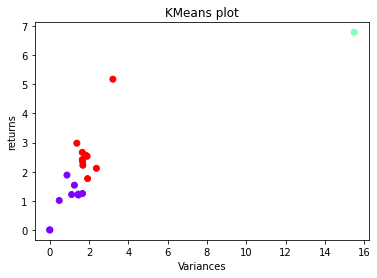

In [40]:
plt.scatter(X4.iloc[:,0],X4.iloc[:,1],c=labels4,cmap='rainbow')
plt.title('KMeans plot')
plt.xlabel('Variances')
plt.ylabel('returns')
plt.show()

<h2> The efficient frontier and optimal weights

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [42]:
# We will work with this stocks
ticks=['Carbon Emissions','Brent Oil','Aluminum','CHFJPY','USDCHF','GBPAUD','USDJPY','Ethereum','Bitcoin','XRP']

In [43]:
data=pd.DataFrame()
for i in ticks:
    d=pd.read_csv("C:/Users/Jihed/Desktop/Compétition/{j}.csv".format(j=i),index_col='Date',parse_dates=True)
    data[i]=d['Close']
data

,Carbon Emissions,Brent Oil,Aluminum,CHFJPY,USDCHF,GBPAUD,USDJPY,Ethereum,Bitcoin,XRP
Date,,,,,,,,,,
2015-01-02,7.01,56.42,1828.00,120.35,1.0013,1.8947,120.50,NaN,315.2,NaN
2015-01-05,6.90,53.11,1812.25,118.80,1.0071,1.8866,119.64,NaN,274.8,NaN
2015-01-06,6.77,51.10,1780.25,117.22,1.0101,1.8740,118.41,NaN,282.3,NaN
2015-01-07,6.78,51.15,1783.50,117.57,1.0144,1.8702,119.25,NaN,291.3,NaN
2015-01-08,6.81,50.96,1825.50,117.49,1.0186,1.8577,119.66,NaN,282.7,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-06-17,82.12,113.12,2498.00,139.12,0.9697,1.7615,134.96,1086.47,20444.6,0.32092
2022-06-20,84.01,114.13,2527.00,139.59,0.9673,1.7618,135.08,1128.32,20572.3,0.32242
2022-06-21,84.61,114.65,2533.50,141.37,0.9661,1.7613,136.61,1125.96,20720.4,0.32936


In [44]:
data.shape

(1922, 10)

In [45]:
data=data.dropna()
data

,Carbon Emissions,Brent Oil,Aluminum,CHFJPY,USDCHF,GBPAUD,USDJPY,Ethereum,Bitcoin,XRP
Date,,,,,,,,,,
2016-03-10,4.90,40.05,1558.0,114.88,0.9849,1.9164,113.19,11.75,415.8,0.00820
2016-03-11,4.98,40.39,1560.0,115.72,0.9836,1.9009,113.81,11.95,419.1,0.00922
2016-03-14,4.85,39.53,1540.0,115.29,0.9873,1.9024,113.83,12.50,414.3,0.00830
2016-03-15,4.85,38.74,1520.0,114.65,0.9872,1.8980,113.19,13.06,415.1,0.00787
2016-03-16,4.95,40.33,1509.0,115.24,0.9770,1.8881,112.59,12.88,415.9,0.00819
...,...,...,...,...,...,...,...,...,...,...
2022-06-16,83.00,119.81,2504.5,136.71,0.9666,1.7523,132.20,1068.49,20386.6,0.31304
2022-06-17,82.12,113.12,2498.0,139.12,0.9697,1.7615,134.96,1086.47,20444.6,0.32092
2022-06-20,84.01,114.13,2527.0,139.59,0.9673,1.7618,135.08,1128.32,20572.3,0.32242


In [46]:
SD = data.std()
SD

Carbon Emissions       23.019256
Brent Oil              17.409430
Aluminum              438.734876
CHFJPY                  6.035554
USDCHF                  0.035006
GBPAUD                  0.085685
USDJPY                  5.048319
Ethereum             1159.015327
Bitcoin             17244.483620
XRP                     0.374044
dtype: float64

<AxesSubplot:>

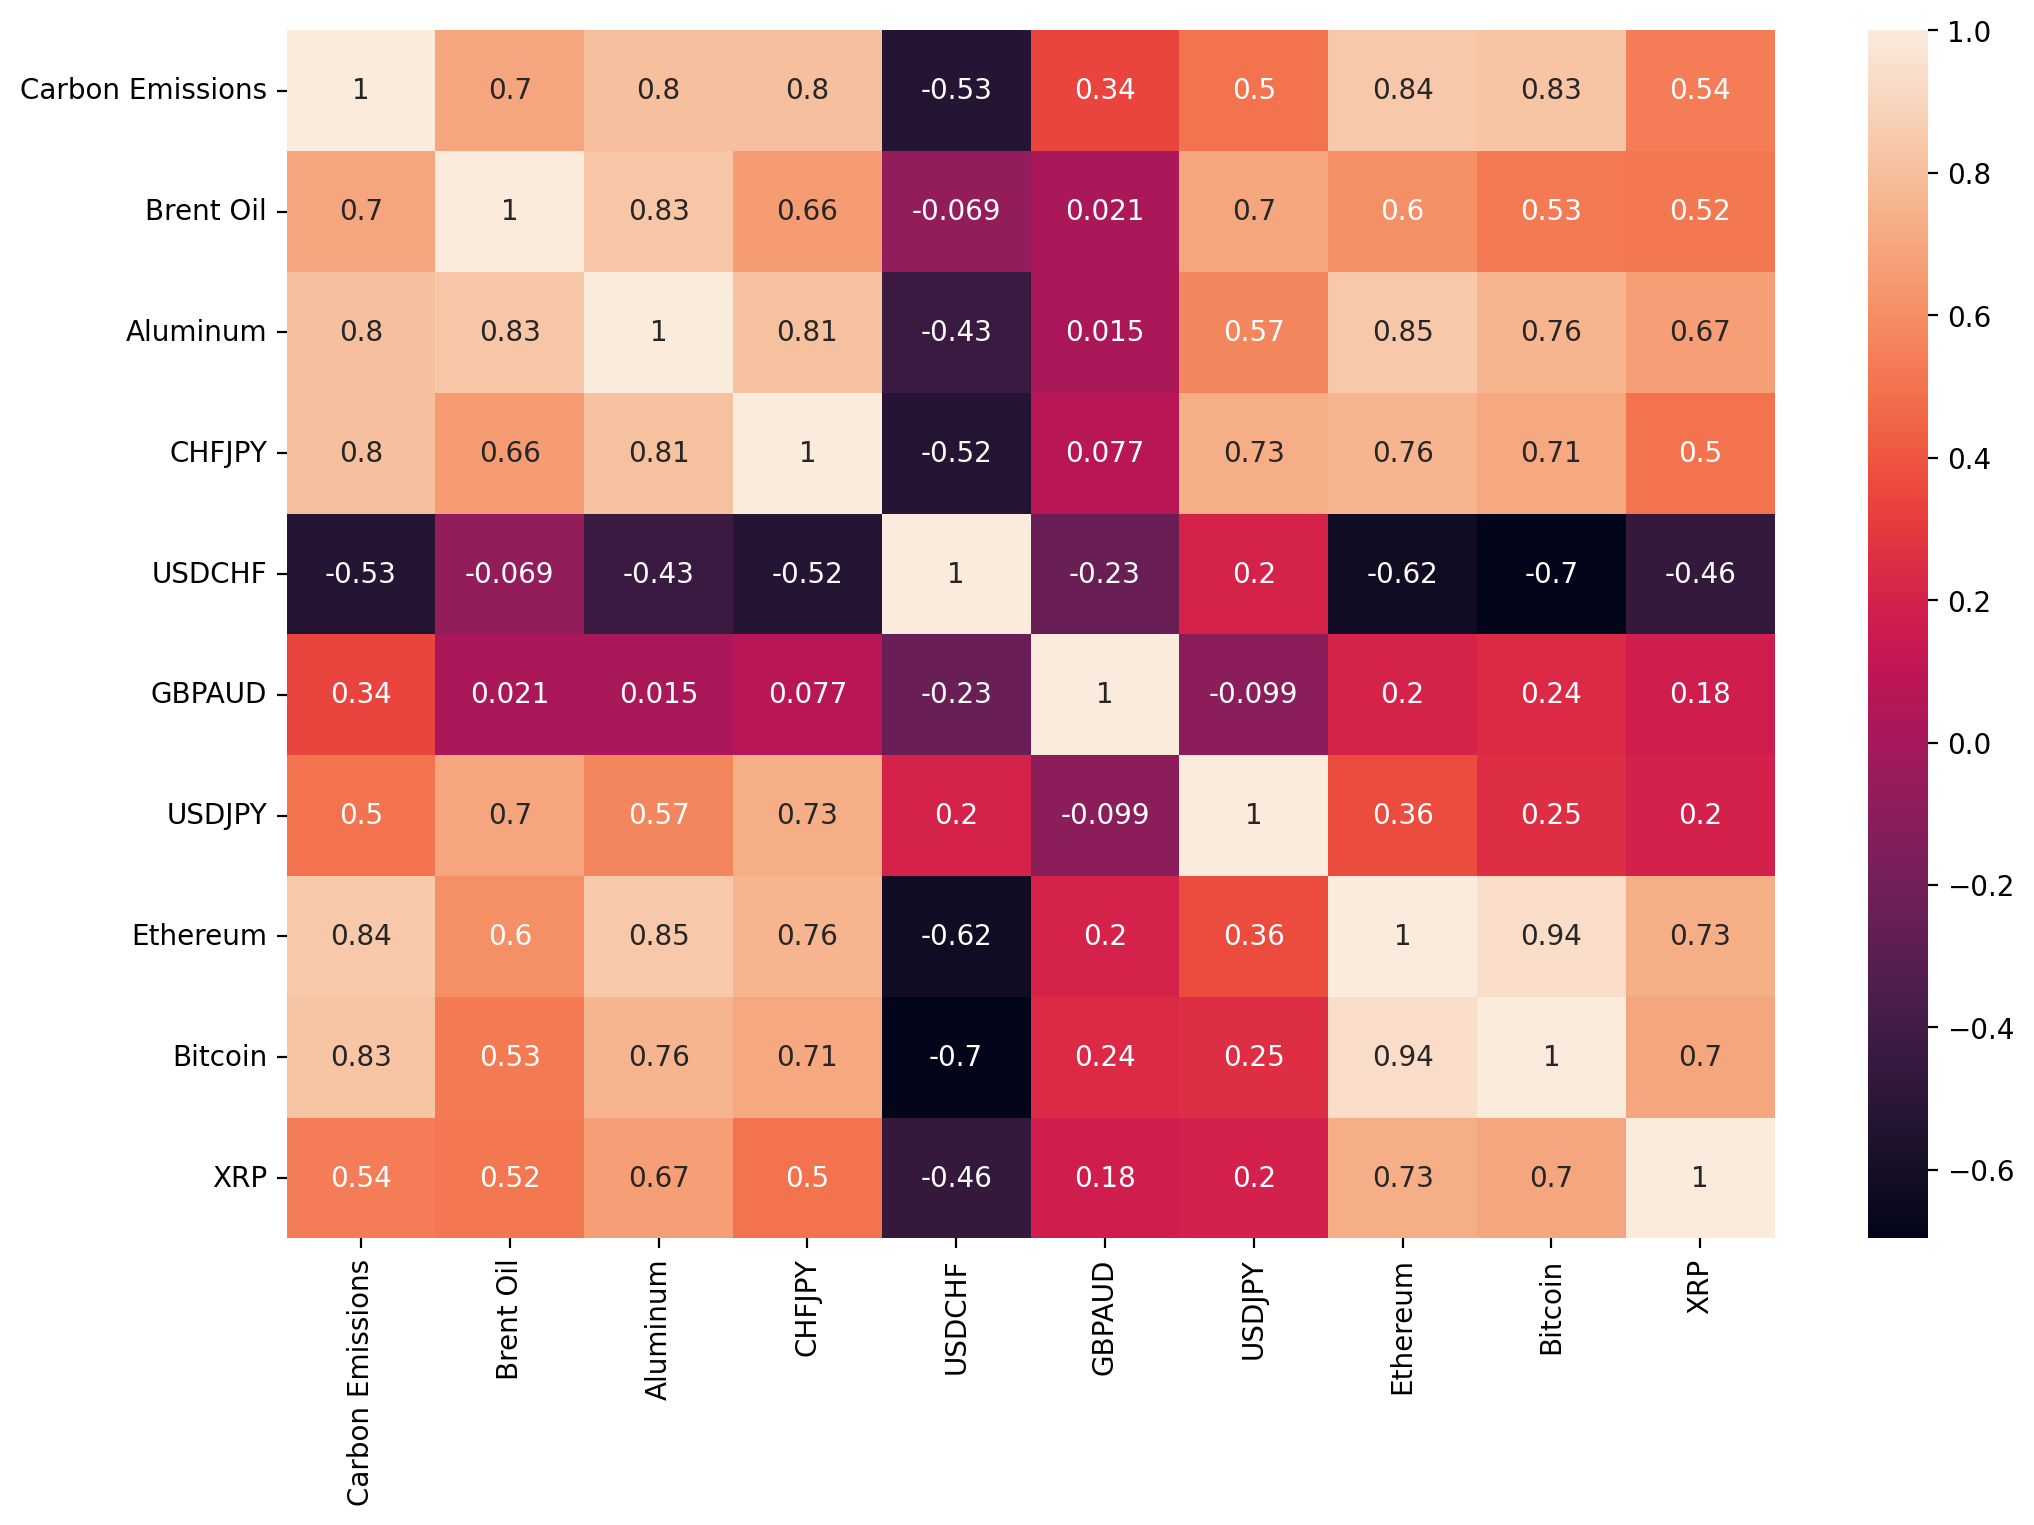

In [47]:
import seaborn as sns
from matplotlib.pyplot import figure
figure(figsize=(12,8),dpi=200)
data.corr()
sns.heatmap(data.corr(),annot=True)

In [48]:
dTest = data.iloc[data.shape[0] - 252:,:] 
dTrain = data.iloc[:data.shape[0] - 252,:]

print("Testing Data dimensions: ", dTest.shape)
print("Training Data dimensions:", dTrain.shape)

Testing Data dimensions:  (252, 10)
Training Data dimensions: (1335, 10)


In [49]:
dTrain

,Carbon Emissions,Brent Oil,Aluminum,CHFJPY,USDCHF,GBPAUD,USDJPY,Ethereum,Bitcoin,XRP
Date,,,,,,,,,,
2016-03-10,4.90,40.05,1558.0,114.88,0.9849,1.9164,113.19,11.75,415.8,0.00820
2016-03-11,4.98,40.39,1560.0,115.72,0.9836,1.9009,113.81,11.95,419.1,0.00922
2016-03-14,4.85,39.53,1540.0,115.29,0.9873,1.9024,113.83,12.50,414.3,0.00830
2016-03-15,4.85,38.74,1520.0,114.65,0.9872,1.8980,113.19,13.06,415.1,0.00787
2016-03-16,4.95,40.33,1509.0,115.24,0.9770,1.8881,112.59,12.88,415.9,0.00819
...,...,...,...,...,...,...,...,...,...,...
2021-06-16,51.72,74.39,2469.5,121.78,0.9085,1.8375,110.69,2367.28,38336.0,0.83195
2021-06-17,51.28,73.08,2400.0,120.07,0.9173,1.8431,110.20,2371.62,38052.0,0.84118
2021-06-18,52.26,73.51,2385.0,119.41,0.9224,1.8464,110.19,2229.53,35749.4,0.79581


In [50]:
dTest

,Carbon Emissions,Brent Oil,Aluminum,CHFJPY,USDCHF,GBPAUD,USDJPY,Ethereum,Bitcoin,XRP
Date,,,,,,,,,,
2021-06-23,55.03,75.19,2439.5,120.71,0.9187,1.8423,110.94,1968.39,33674.3,0.63785
2021-06-24,55.49,75.56,2440.0,120.78,0.9175,1.8357,110.86,1989.14,34665.8,0.67224
2021-06-25,55.48,76.18,2486.0,120.68,0.9175,1.8288,110.77,1810.57,31594.0,0.61180
2021-06-28,55.90,74.68,2490.0,120.28,0.9193,1.8342,110.62,2083.09,34475.9,0.64393
2021-06-29,56.04,74.76,2551.5,119.98,0.9206,1.8415,110.50,2158.71,35834.7,0.70523
...,...,...,...,...,...,...,...,...,...,...
2022-06-16,83.00,119.81,2504.5,136.71,0.9666,1.7523,132.20,1068.49,20386.6,0.31304
2022-06-17,82.12,113.12,2498.0,139.12,0.9697,1.7615,134.96,1086.47,20444.6,0.32092
2022-06-20,84.01,114.13,2527.0,139.59,0.9673,1.7618,135.08,1128.32,20572.3,0.32242


In [51]:
from scipy import stats

expected_returns_a = dTrain.pct_change() # Daily returns from trading day to day...

expected_returns_a.columns = ticks # Setting the Column names

expected_returns_aA = pd.DataFrame(expected_returns_a.mean()*252) # Annualizing the average rate of return

expected_returns_aA = expected_returns_aA.T  


dar = dTrain.pct_change().iloc[1:,:]+1 # dar = portfolio returns for each period (in this case day to day)
geo_ar = pd.DataFrame(np.prod(dar)**(1/float(3.5)) - 1) # Geometric Average Rate of Return
# 3.5 is the number of years I am working with (earlier I've took out a year for training purposes.)

full_return_annual = (pd.concat([expected_returns_aA.T, geo_ar], axis = 1))



In [52]:
full_return_annual.columns = ["Average Arithmetic Returns", "Average Geometric Returns"] 
full_return_annual

,Average Arithmetic Returns,Average Geometric Returns
Carbon Emissions,0.561400,0.982522
Brent Oil,0.202577,0.195448
Aluminum,0.098238,0.134745
CHFJPY,0.011854,0.013740
USDCHF,-0.011010,-0.019958
GBPAUD,-0.002402,-0.010621
USDJPY,-0.000784,-0.006489
Ethereum,1.588171,3.261161
Bitcoin,1.120090,2.474106
XRP,1.783344,2.316820


In [53]:
portfolio_returns = []
portfolio_volatility = []
sharpe_ratio = []

# This is what is going to be randomized
stock_weights = []

# Number of Indiviudal securities that will be a part of the portfolio
num_assets = len(ticks)

# Number of simulated iterations
num_portfolios = 100000

# Getting the covariance matrix
# Gets a percentage change one day to the next
daily_returns = dTrain.pct_change()

# Converting daily returns to annual returns (standardizing to a year)
annual_returns = (daily_returns.mean() * 252) + 1

# Obtaining the covariance of annual
cov_daily = daily_returns.cov() # Covariance
cov_annual = cov_daily*252 # Covariance Annualized

print(annual_returns)

Carbon Emissions    1.561400
Brent Oil           1.202577
Aluminum            1.098238
CHFJPY              1.011854
USDCHF              0.988990
GBPAUD              0.997598
USDJPY              0.999216
Ethereum            2.588171
Bitcoin             2.120090
XRP                 2.783344
dtype: float64


In [55]:
# Setting seed of interpretability
np.random.seed(3)
# Filling in the lists with a simulated return, risk, and a given weight
# num_portfolios
for i in range(num_portfolios):
    
    # Randomly assign weights
    weights = np.random.random(num_assets)
    # Standardize the weights
    weights /= np.sum(weights)
    returns = round(np.dot(weights, (annual_returns)),2)
    
    volatility = (np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights))))
   
    sharpe = (returns-1.05) / volatility  # risk_free_rate = 0.05

    sharpe_ratio.append(sharpe)
    portfolio_returns.append(returns-1.05)
    portfolio_volatility.append(volatility)
    stock_weights.append(weights)

In [56]:
# Storing the portfolio values
portfolio = {'Returns': portfolio_returns,
             'Volatility': portfolio_volatility,
             'Sharpe Ratio': sharpe_ratio}

# Add an additional entry to the portfolio such that each indivudal weight is incorporated for its corresponding company
for counter,symbol in enumerate(ticks):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)
df

,Returns,Volatility,Sharpe Ratio,Carbon Emissions Weight,Brent Oil Weight,Aluminum Weight,CHFJPY Weight,USDCHF Weight,GBPAUD Weight,USDJPY Weight,Ethereum Weight,Bitcoin Weight,XRP Weight
0,0.30,0.201214,1.490950,0.117817,0.151475,0.062225,0.109267,0.191004,0.191719,0.026863,0.044330,0.011009,0.094290
1,0.48,0.306576,1.565682,0.007585,0.115987,0.164814,0.070706,0.171697,0.150017,0.006089,0.141890,0.065823,0.105392
2,0.54,0.366485,1.473457,0.059669,0.145874,0.092695,0.033013,0.114624,0.164221,0.064476,0.046712,0.081650,0.197066
3,0.39,0.219223,1.779010,0.172284,0.118690,0.159369,0.149293,0.066724,0.016278,0.115341,0.098471,0.063824,0.039727
4,0.39,0.241938,1.611984,0.093302,0.107628,0.061793,0.066970,0.105045,0.197504,0.134553,0.065064,0.063799,0.104342
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.39,0.242045,1.611269,0.023417,0.100606,0.149373,0.154120,0.074488,0.159411,0.057221,0.058428,0.151602,0.071334
99996,0.57,0.350292,1.627212,0.038546,0.042940,0.052623,0.041529,0.091245,0.162005,0.171378,0.167278,0.142067,0.090388
99997,0.66,0.420425,1.569842,0.034737,0.173086,0.129049,0.129066,0.000071,0.106695,0.022480,0.137896,0.079701,0.187218
99998,0.36,0.207862,1.731918,0.139549,0.107646,0.161297,0.101648,0.067403,0.157787,0.046113,0.080258,0.113453,0.024847


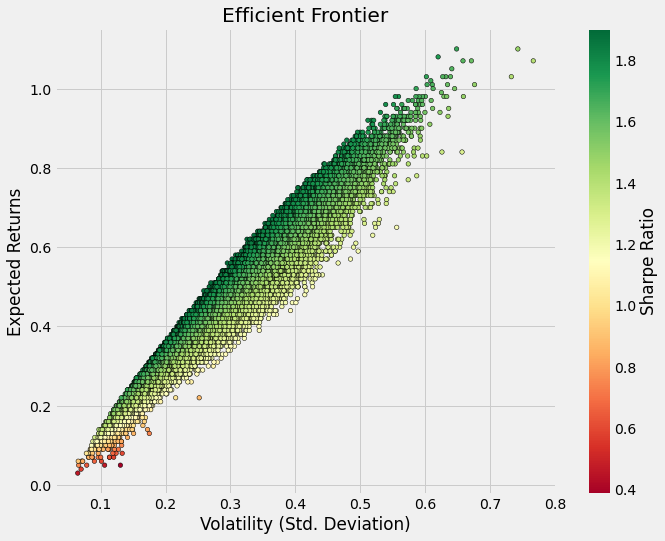

In [57]:
# PLotting the efficient frontier.
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

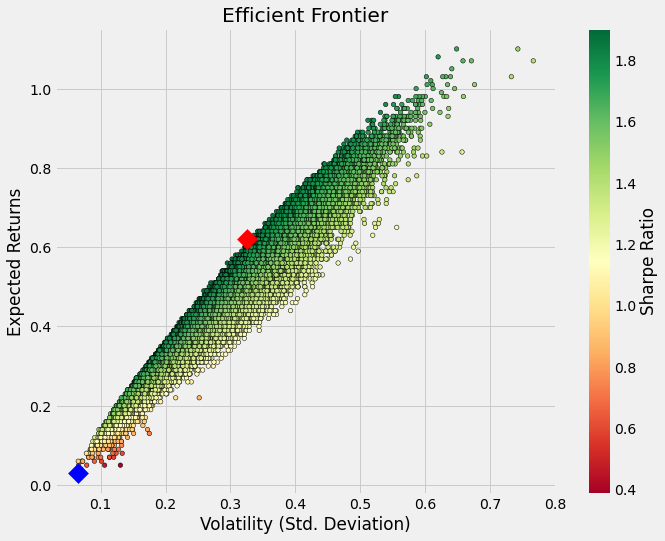

In [58]:
# Finding the Optimal Portfolio
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('fivethirtyeight')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [59]:
r_ef = pd.concat([min_variance_port.T,sharpe_portfolio.T], axis = 1)
r_ef.columns = ["Minimum Risk Adjusted Values1", "Max Risk Adjusted Values"]
r_ef

,Minimum Risk Adjusted Values1,Max Risk Adjusted Values
Returns,0.030000,0.620000
Volatility,0.064687,0.325481
Sharpe Ratio,0.463771,1.904871
Carbon Emissions Weight,0.008983,0.302926
Brent Oil Weight,0.015231,0.058122
Aluminum Weight,0.220601,0.039982
CHFJPY Weight,0.074137,0.011946
USDCHF Weight,0.208618,0.009628
GBPAUD Weight,0.261025,0.077952
USDJPY Weight,0.177440,0.146687


in this case Sharpe Ratio > 1 

<h2> Testing 

In [60]:
amount_invest = 1000
expected_return = pd.DataFrame(amount_invest * (1+r_ef.iloc[0,:]))
print("----------------------------------------------------------------")
print("                Expected Returns on my Portfolio")
print("----------------------------------------------------------------")
print(expected_return.T)
print("")
print("----------------------------------------------------------------")
print("If I invested", amount_invest,"USD on |", dTest.index[0],"| I would have...")
actual_return = (dTest.iloc[dTest.shape[0]-1,:] - dTest.iloc[0,:]) / ( dTest.iloc[0,:])
# Multipling the weights to the price at the beginning of the year
beg_price = (dTest.iloc[0,:])
end_price = dTest.iloc[dTest.shape[0]-1,:]
print("----------------------------------------------------------------")

# Weights derived from the Efficient Frontier Portfolio
# Weights for Minimum Risk
w = np.array(r_ef.iloc[3:,0])

percentage_change = (end_price - beg_price)/(beg_price)+1
print("Using the Portfolio Weights for Minimum Risk Return Portfolio")
money_left = sum(w * percentage_change* amount_invest)
print("")
print("    Starting balance $ 1000 : Ending with $ ",round(money_left, 2))
print("")
print("----------------------------------------------------------------")
print("Using the Portfolio Weights Maximized Risk-Return Portfolio")
# Weights for Maxmimum Risk
w1 = np.array(r_ef.iloc[3:,1])

money_left1 = sum(w1 * percentage_change* amount_invest)
print("")
print("    Starting balance $ 1000 : Ending with $ ", round(money_left1,2))
print("")

----------------------------------------------------------------
                Expected Returns on my Portfolio
----------------------------------------------------------------
         Minimum Risk Adjusted Values1  Max Risk Adjusted Values
Returns                         1030.0                    1620.0

----------------------------------------------------------------
If I invested 1000 USD on | 2021-06-23 00:00:00 | I would have...
----------------------------------------------------------------
Using the Portfolio Weights for Minimum Risk Return Portfolio

    Starting balance $ 1000 : Ending with $  1052.4

----------------------------------------------------------------
Using the Portfolio Weights Maximized Risk-Return Portfolio

    Starting balance $ 1000 : Ending with $  1055.52



<h3> Equally weighted portfolio

In [61]:
Weights1=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

In [62]:
money_left = sum(Weights1 * percentage_change* amount_invest)

In [63]:
money_left

1003.2833484422222

In this case we end with 1003.2833 which is between Using the Portfolio Weights for Minimum Risk Return Portfolio
 and Using the Portfolio Weights Maximized Risk-Return Portfolio
